<a id="4"></a>
# <p style="background-color:#001f3f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Importing Libraries</p>

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, chi2_contingency, ttest_ind, f_oneway
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
import optuna
from sklearn.datasets import make_classification

In [113]:
rc = {
    "axes.facecolor": "#243139",
    "figure.facecolor": "#243139",
    "axes.edgecolor": "#000000",
    "grid.color": "#000000",
    "font.family": "arial",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#FFFFFF",
    "ytick.color": "#FFFFFF",
    "grid.alpha": 0.4,
}
sns.set(rc=rc)

<a id="4"></a>
# <p style="background-color:#001f3f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Loading Data</p>

In [114]:
df = pd.read_csv(r"C:\Users\laptop shop\Downloads\WA_Fn-UseC_-Telco-Customer-Churn (2).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="4"></a>
# <p style="background-color:#001f3f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Data Exploration</p>

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9941 entries, 0 to 9940
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        9941 non-null   object 
 1   gender            9941 non-null   object 
 2   SeniorCitizen     9941 non-null   int64  
 3   Partner           9941 non-null   object 
 4   Dependents        9941 non-null   object 
 5   tenure            9941 non-null   int64  
 6   PhoneService      9941 non-null   object 
 7   MultipleLines     9941 non-null   object 
 8   InternetService   9941 non-null   object 
 9   OnlineSecurity    9941 non-null   object 
 10  OnlineBackup      9941 non-null   object 
 11  DeviceProtection  9941 non-null   object 
 12  TechSupport       9941 non-null   object 
 13  StreamingTV       9941 non-null   object 
 14  StreamingMovies   9941 non-null   object 
 15  Contract          9941 non-null   object 
 16  PaperlessBilling  9941 non-null   object 


In [116]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [117]:
for i in df.describe(include="object").T[df.describe(include="object").T['freq'] > 1].index.tolist():
    print(i, ":", df[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)' 'Bank transfer' 'Credit card']
Churn : ['No' 'Yes']


<a id="4"></a>
# <p style="background-color:#001f3f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Preprocessing</p>

In [118]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [119]:
df.dropna(inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9930 entries, 0 to 9940
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        9930 non-null   object 
 1   gender            9930 non-null   object 
 2   SeniorCitizen     9930 non-null   object 
 3   Partner           9930 non-null   object 
 4   Dependents        9930 non-null   object 
 5   tenure            9930 non-null   int64  
 6   PhoneService      9930 non-null   object 
 7   MultipleLines     9930 non-null   object 
 8   InternetService   9930 non-null   object 
 9   OnlineSecurity    9930 non-null   object 
 10  OnlineBackup      9930 non-null   object 
 11  DeviceProtection  9930 non-null   object 
 12  TechSupport       9930 non-null   object 
 13  StreamingTV       9930 non-null   object 
 14  StreamingMovies   9930 non-null   object 
 15  Contract          9930 non-null   object 
 16  PaperlessBilling  9930 non-null   object 
 17  

In [121]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
print("Duplicates :", df.drop('customerID', axis=1).duplicated(keep=False).sum())

Duplicates : 0


In [123]:
df = df[~df.drop('customerID', axis=1).duplicated(keep='first')]

<a id="4"></a>
# <p style="background-color:#001f3f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Basic Statistics</p>

In [124]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,9908.000000,9908.000000,9908.000000
mean,33.752119,66.557750,2379.298025
std,23.584483,29.770803,2171.140543
min,1.000000,18.250000,18.800000
25%,12.000000,42.265000,556.112500
50%,32.000000,70.450000,1664.920000
75%,55.000000,90.950000,3806.682500
max,72.000000,119.990000,8684.800000


In [125]:
df.describe(include=["object","category"]).T

,count,unique,top,freq
customerID,9908,9908,7590-VHVEG,1
gender,9908,2,Male,5001
SeniorCitizen,9908,2,No,7323
Partner,9908,2,No,5024
Dependents,9908,2,No,6390
PhoneService,9908,2,Yes,7753
MultipleLines,9908,3,No,4055
InternetService,9908,3,Fiber optic,4031
OnlineSecurity,9908,3,No,4450
OnlineBackup,9908,3,No,4041


In [126]:
categorical_cols = df.describe(include=["object","category"]).T[df.describe(include=["object","category"]).T['freq'] > 1].index.tolist()
print(categorical_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [127]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
print(numerical_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']


<a id="4"></a>
# <p style="background-color:#001f3f;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>

In [128]:
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    f, ax = plt.subplots(1, 2, figsize=(12, 4))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    colors = sns.color_palette("mako", n_colors=len(s1))

    
    outer_colors = ['#2e1e3b', '#413d7b', '#37659e', '#348fa7', '#40b7ad', '#8bdab2']
    inner_colors = ['#2e1e3b', '#413d7b', '#37659e', '#348fa7', '#40b7ad', '#8bdab2']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
        textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
    )

    textprops = {
        'size': 13, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='#243139', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette=colors, orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,       
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i+0.1, str(v), color='white', fontweight='bold', fontsize=12)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='white')
    ax[1].set_ylabel('count', fontweight="bold", color='white')

    f.suptitle(f'{title_name}', fontsize=14, fontweight='bold', color='white')
    plt.tight_layout() 
    plt.show()

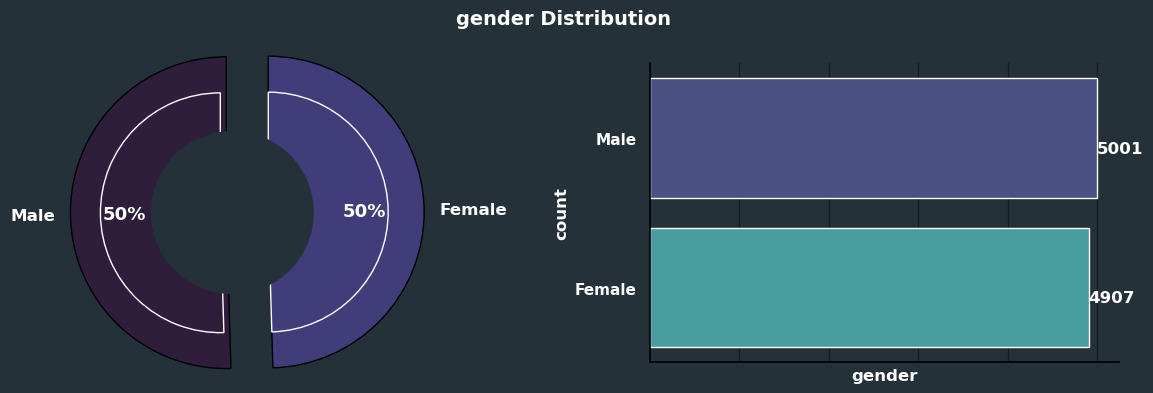

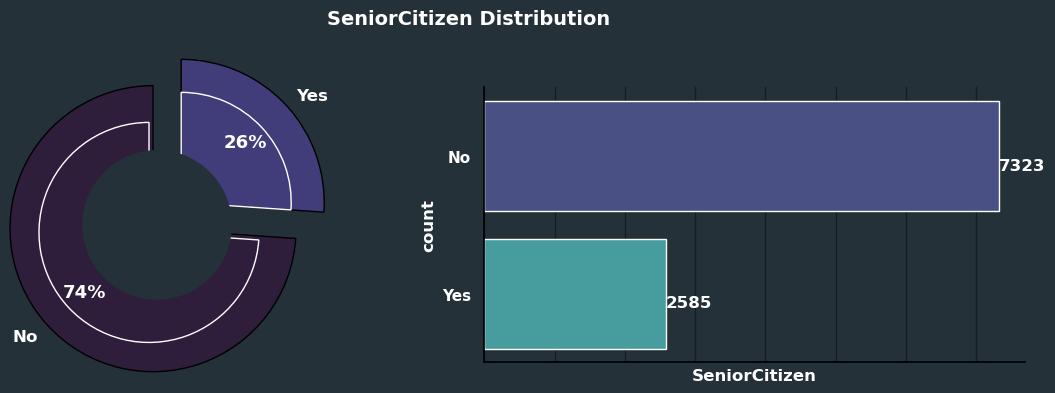

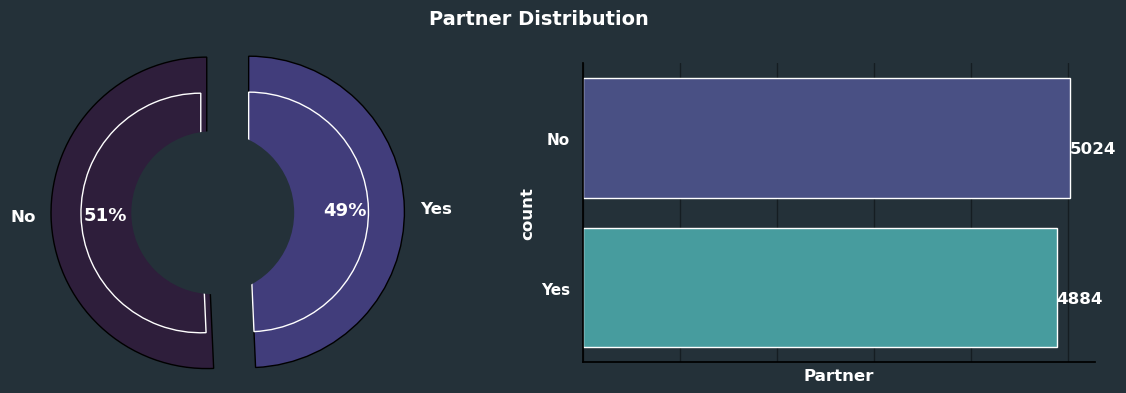

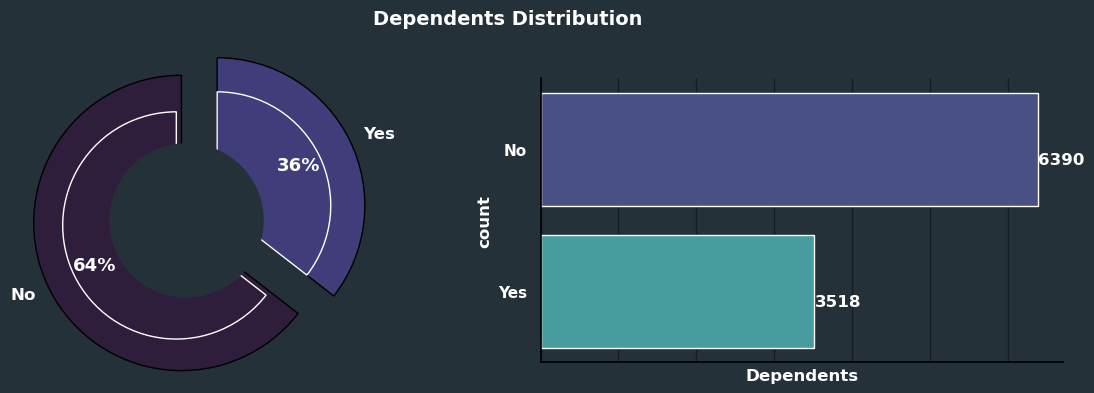

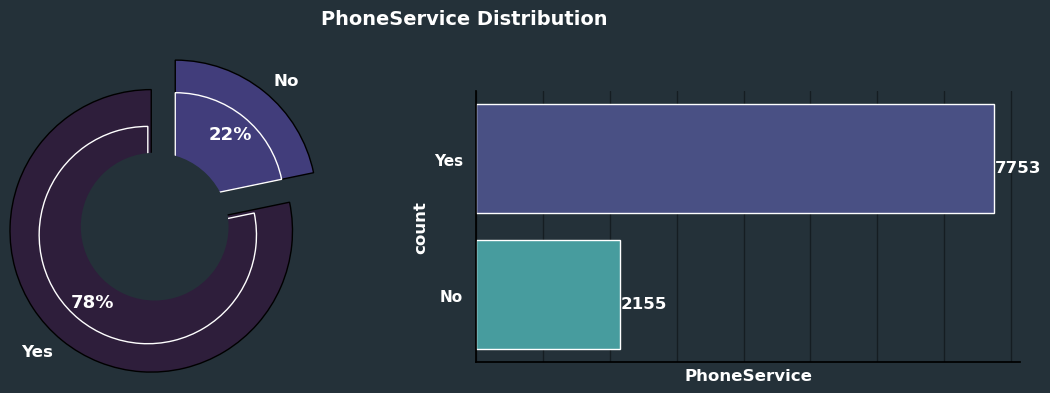

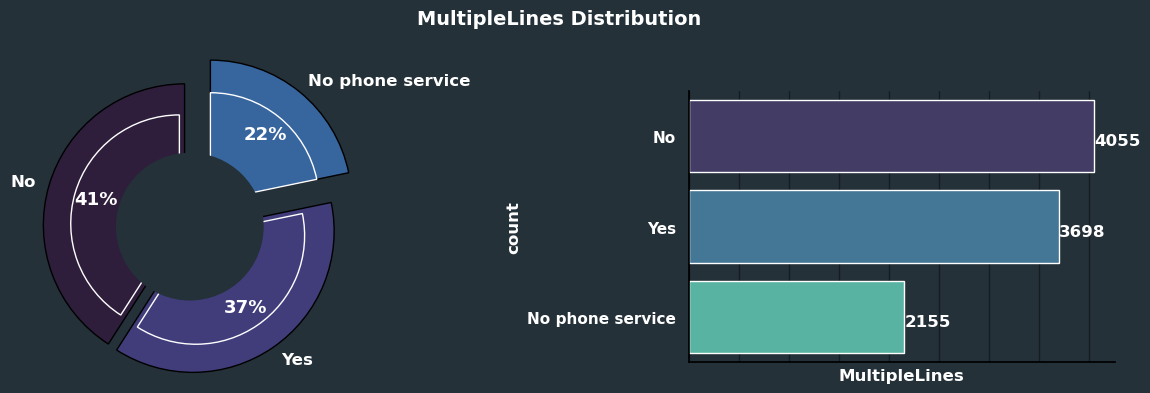

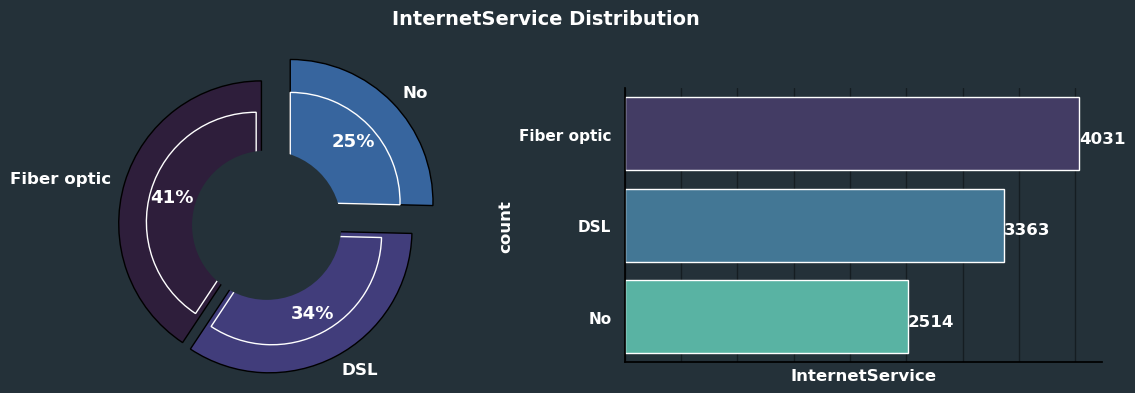

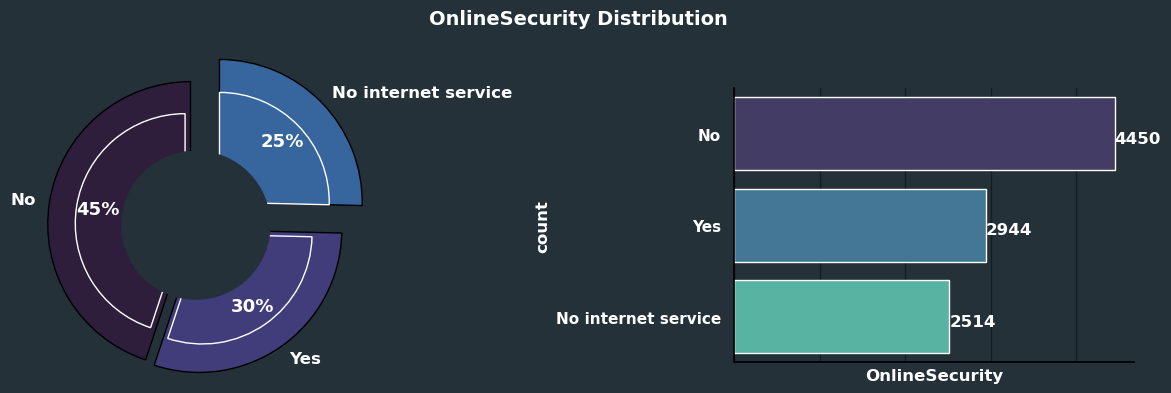

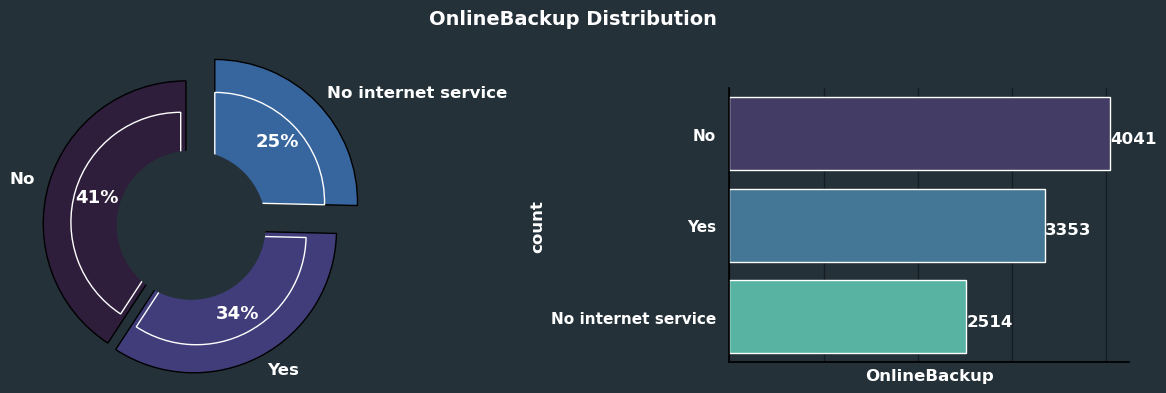

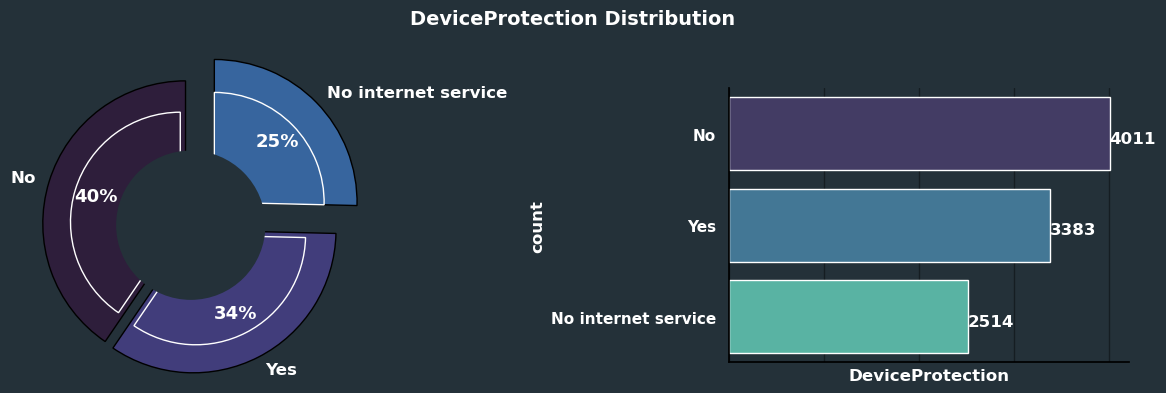

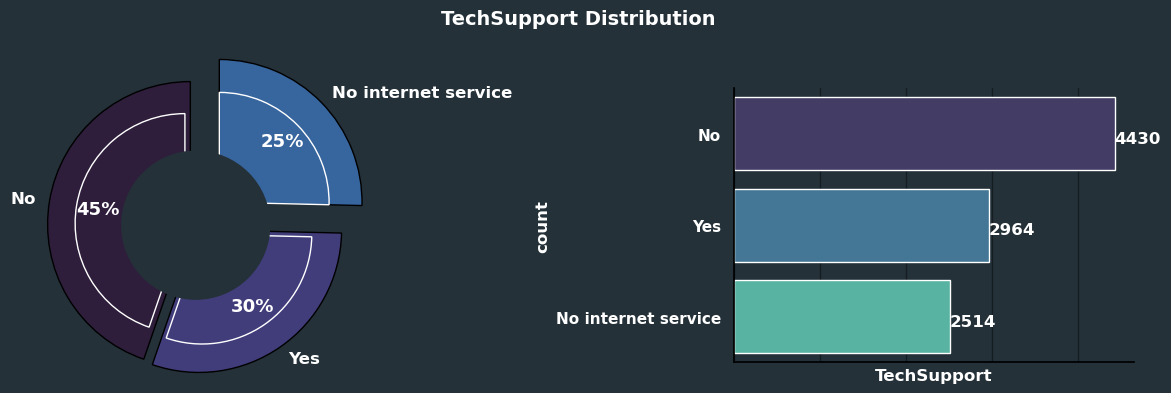

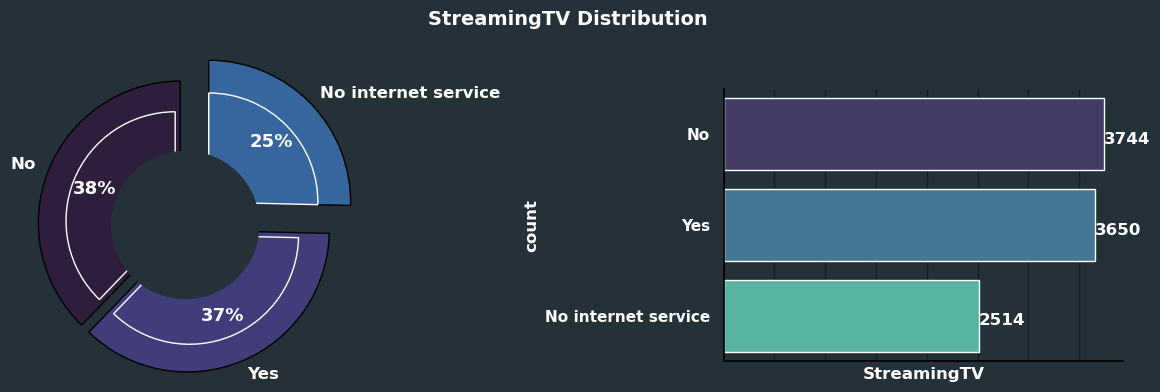

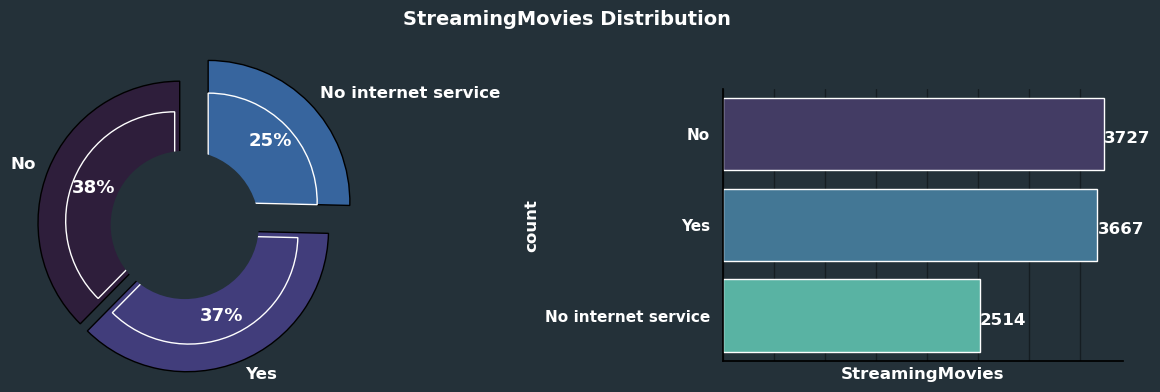

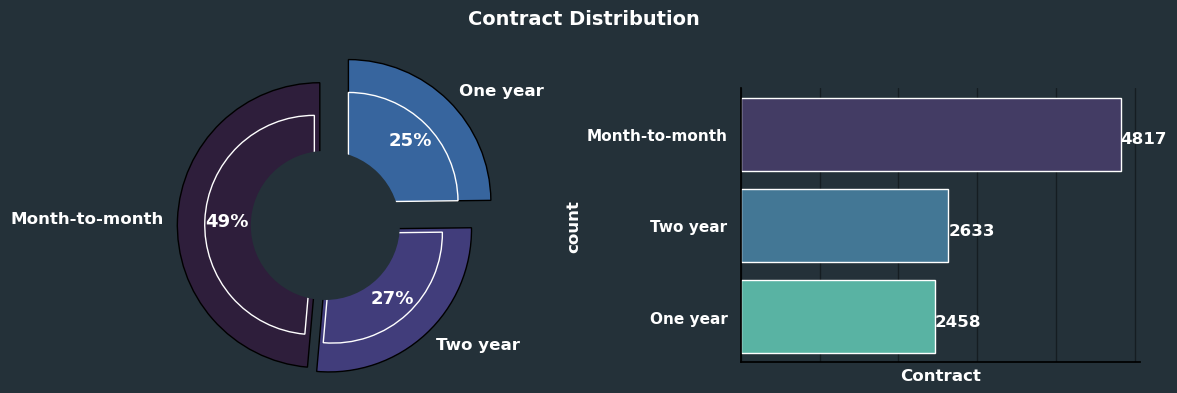

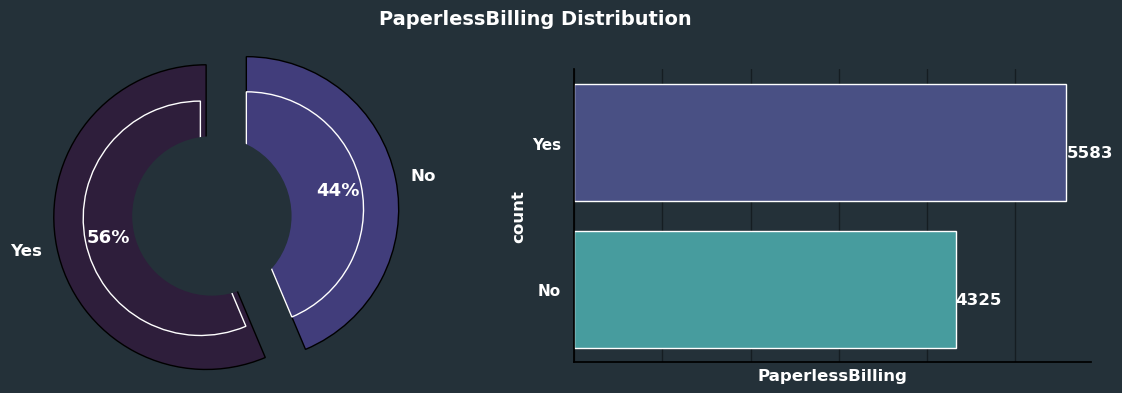

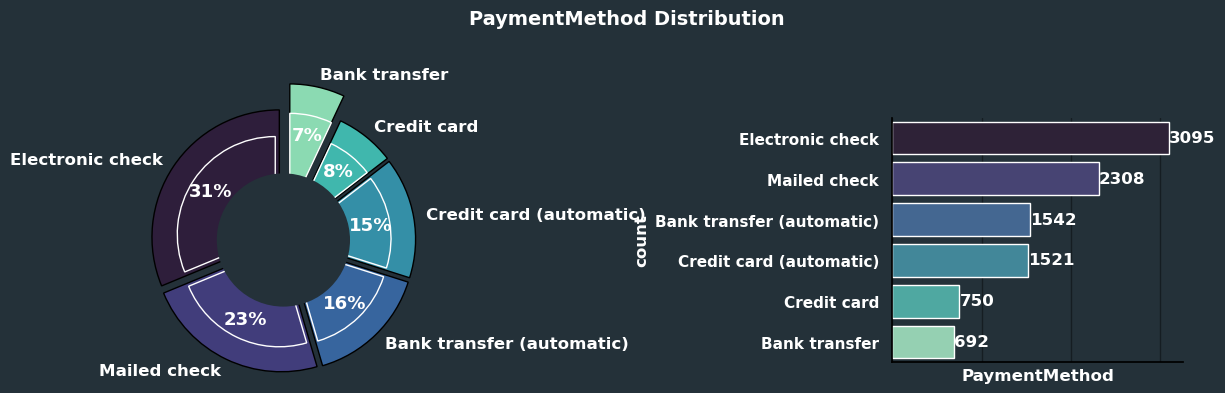

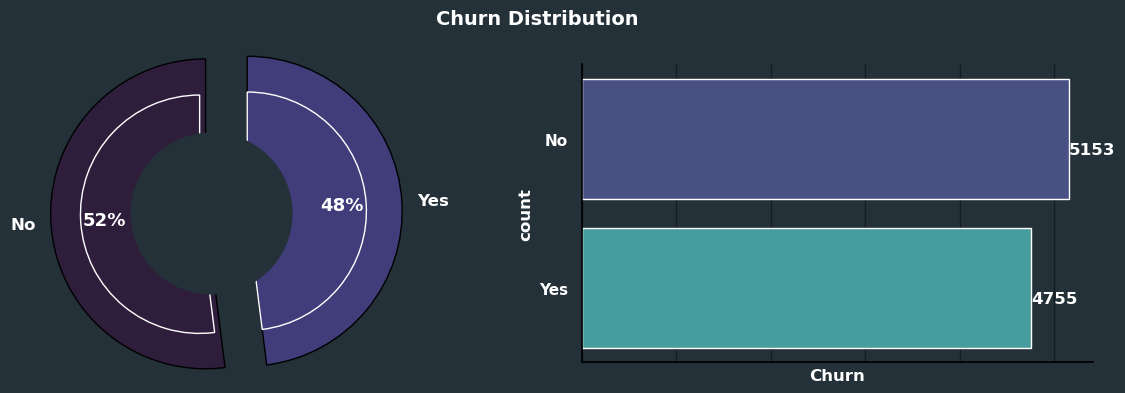

In [129]:
plt.rcParams['font.family'] = 'DejaVu Sans'

for i in categorical_cols:
    plot_count(df, i, f'{i.replace("_", " ")} Distribution')

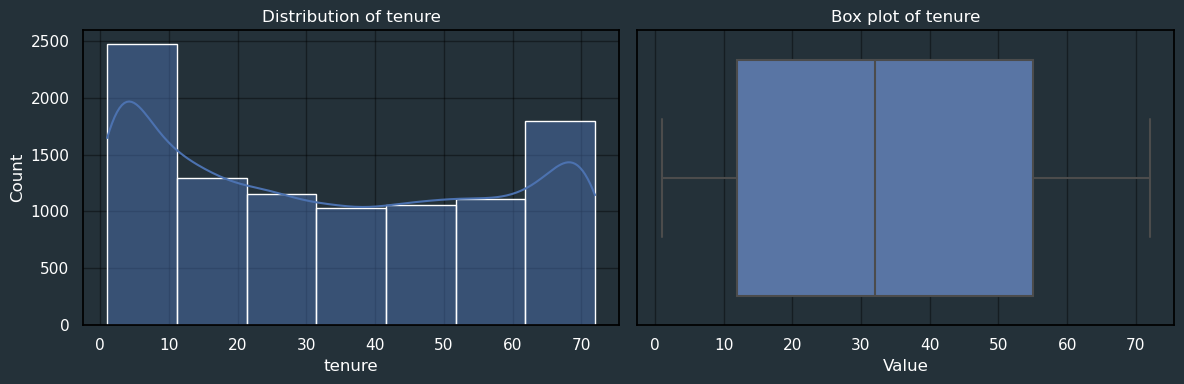

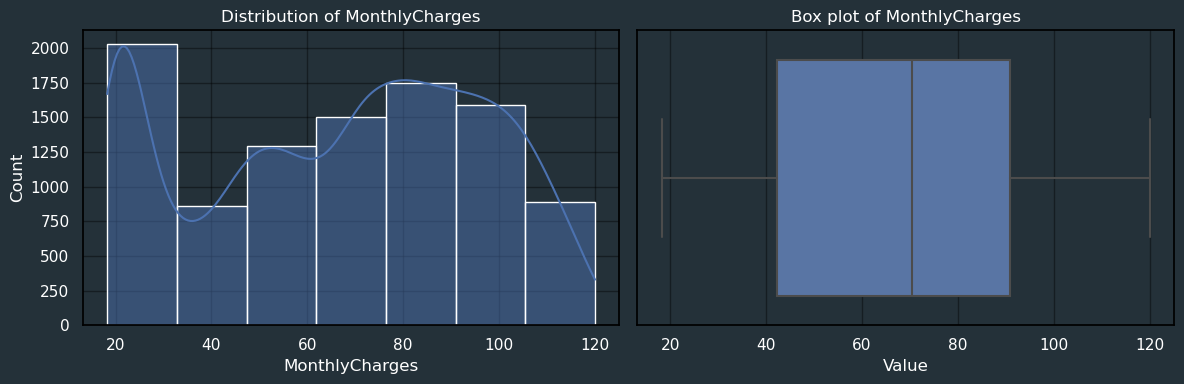

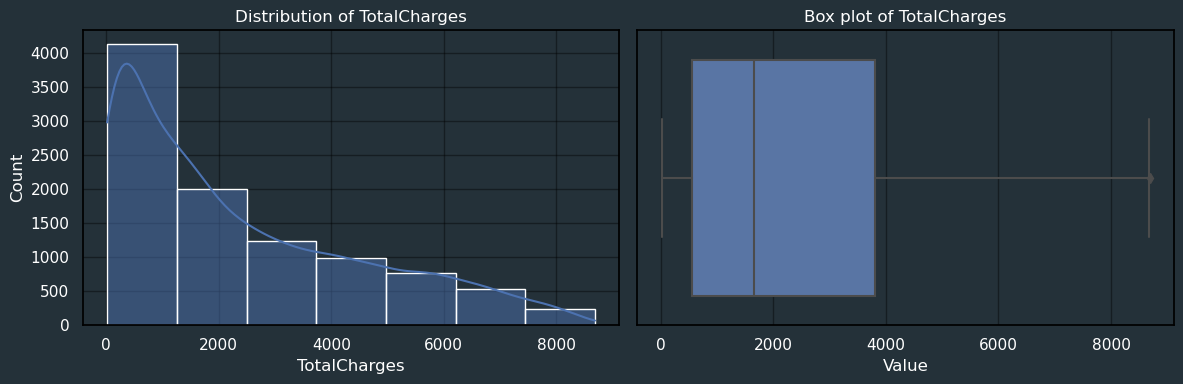

In [130]:
def numerical_distribution(df: pd.core.frame.DataFrame, col: str) -> None:

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  sns.histplot(df[col], bins=7, kde=True, ax=axes[0])
  axes[0].set_title(f'Distribution of {col}', color='white')
  sns.boxplot(x=df[col], ax=axes[1])
  axes[1].set_title(f'Box plot of {col}', color='white')
  axes[1].set_xlabel('Value')
  axes[1].set_ylabel('')

  plt.tight_layout()
  plt.show()

for i in numerical_cols:
  numerical_distribution(df, i)

c:\Users\laptop shop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


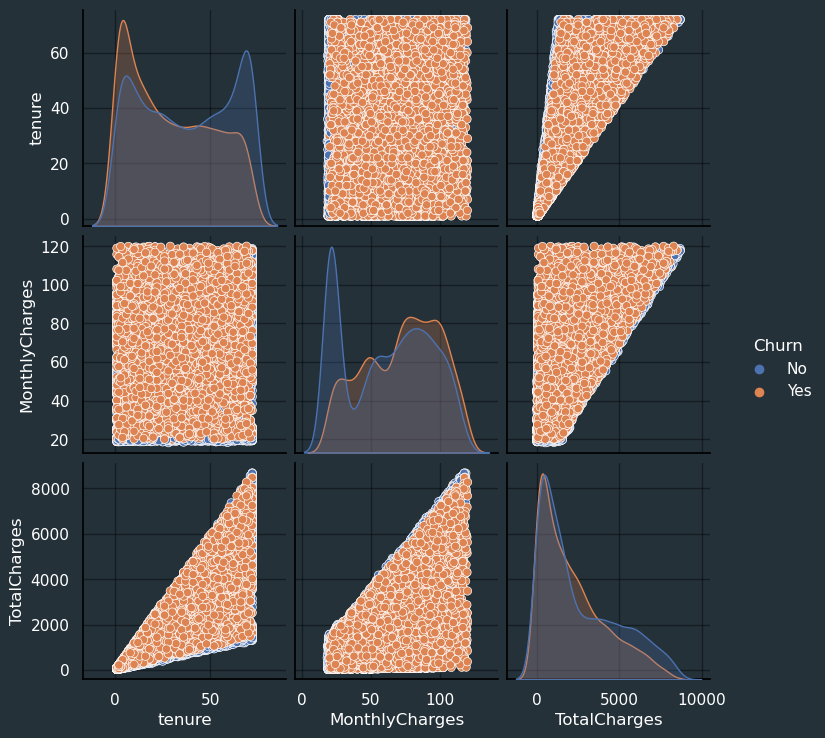

In [131]:
g = sns.pairplot(df, hue='Churn')
for text in g._legend.texts:
    text.set_color("white")
g._legend.get_title().set_color("white")
plt.show()

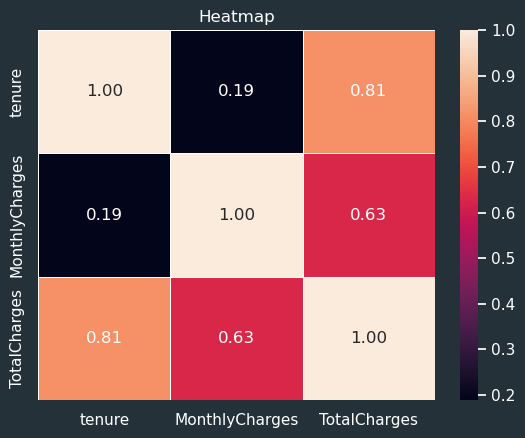

In [132]:
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, fmt=".2f", linewidths=0.5 , annot= True)
plt.title("Heatmap", color = 'white')
plt.show()

In [133]:
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})
categorical_cols.remove('Churn')

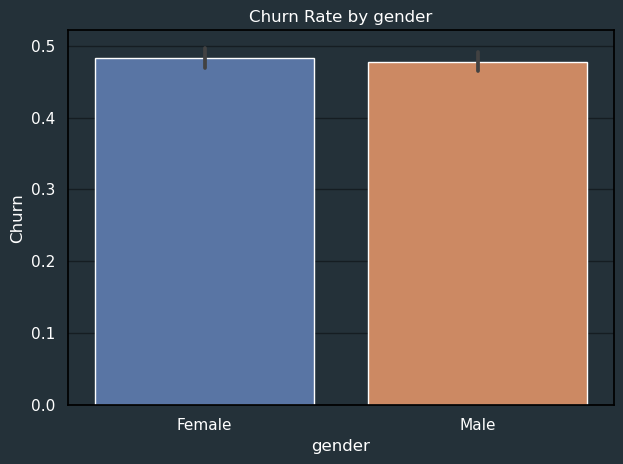

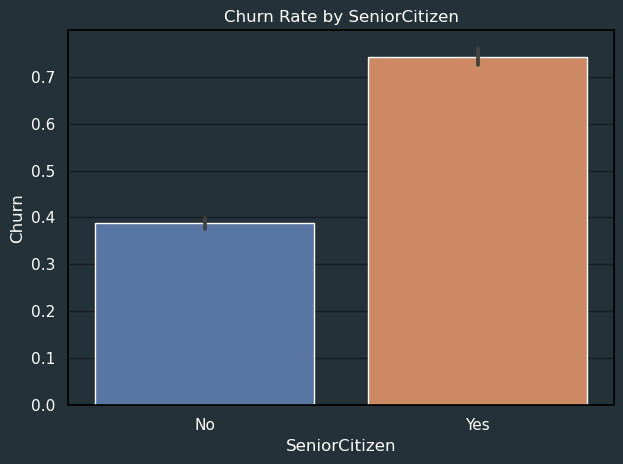

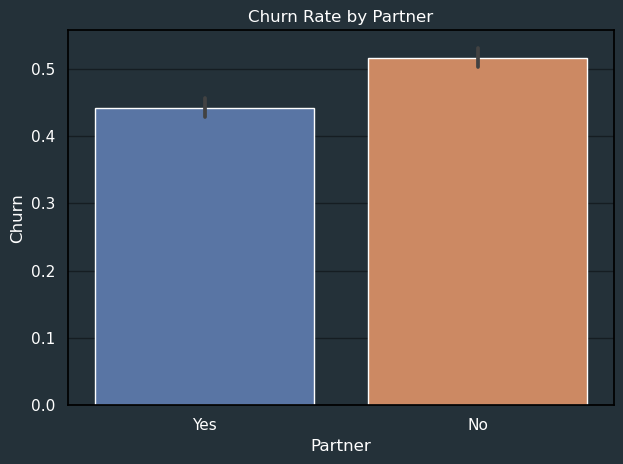

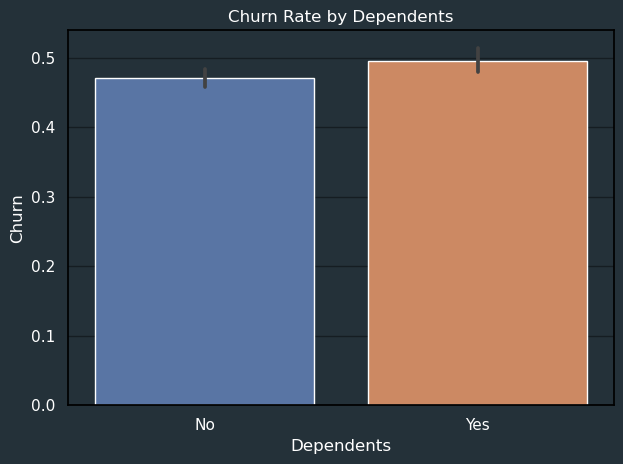

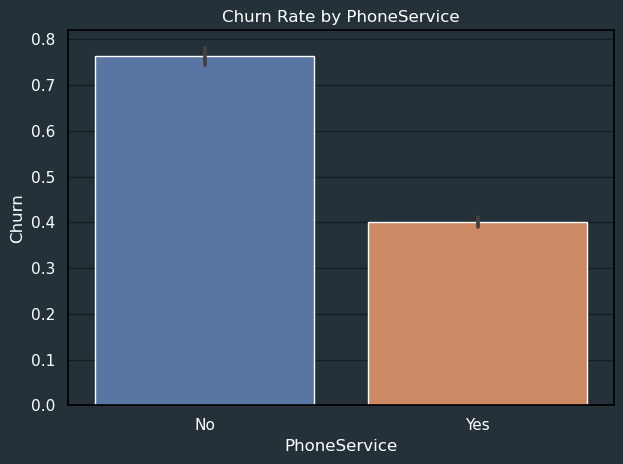

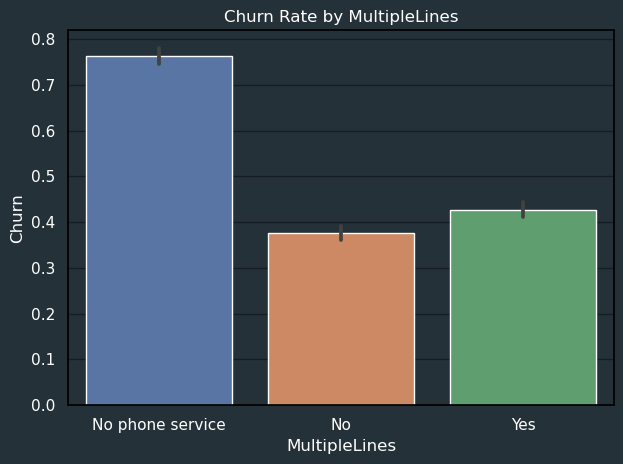

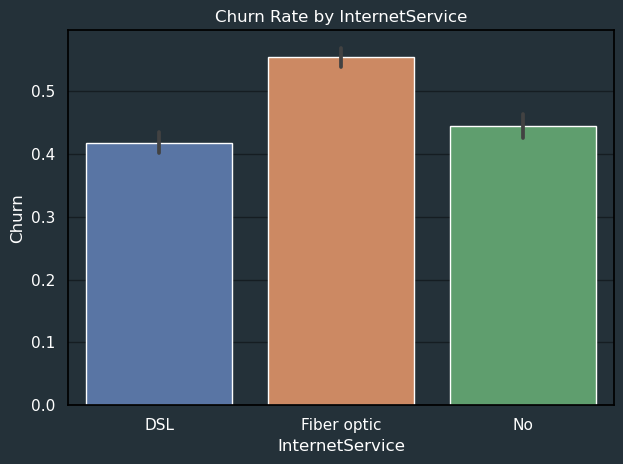

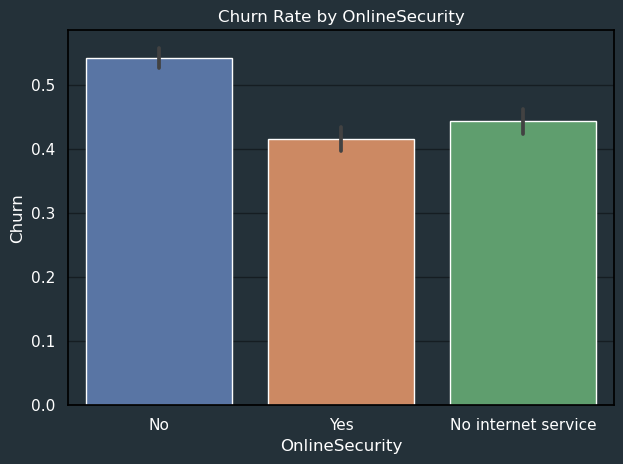

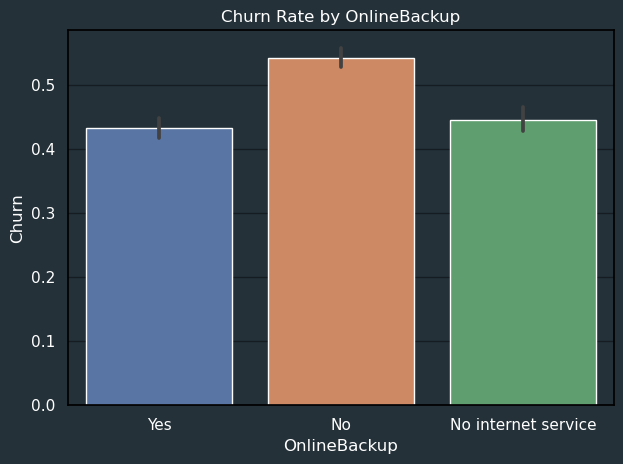

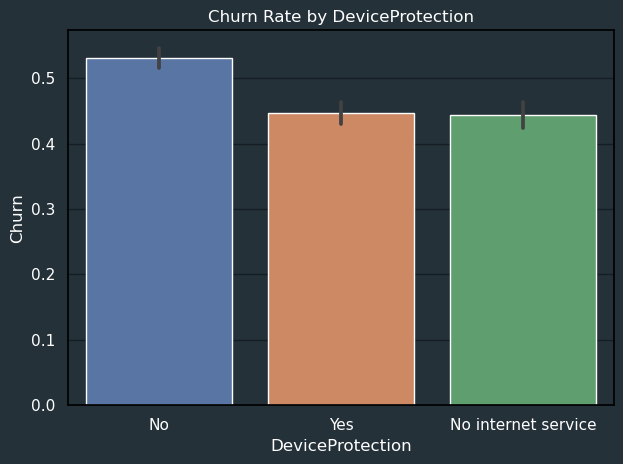

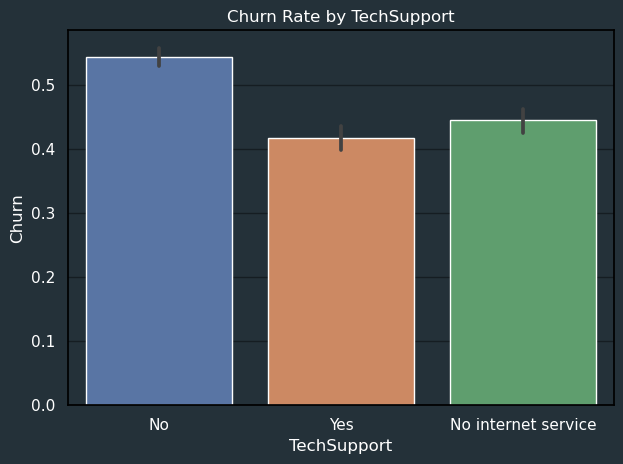

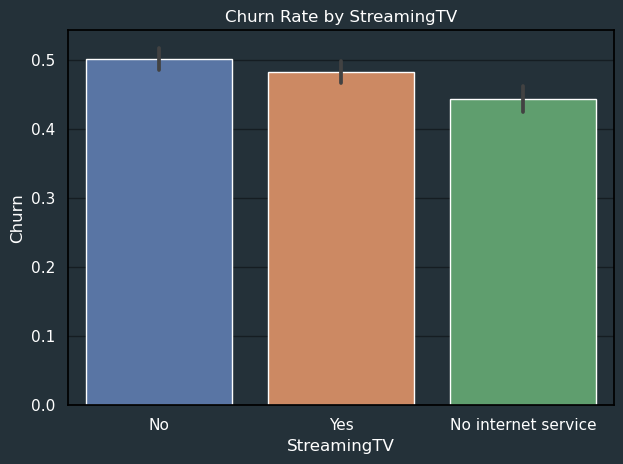

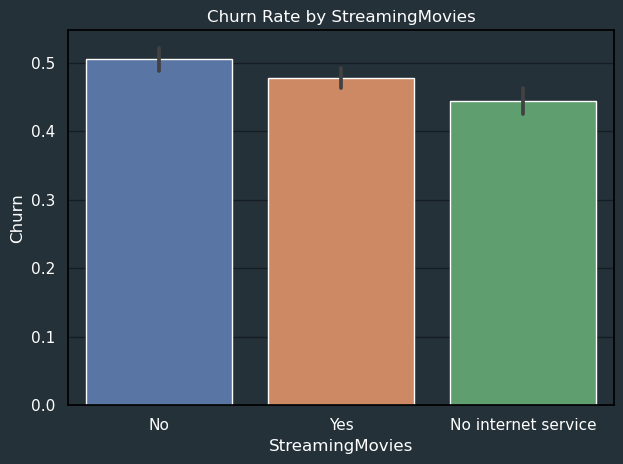

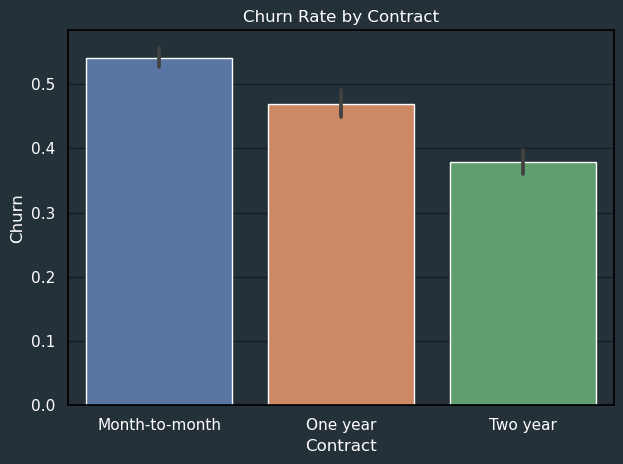

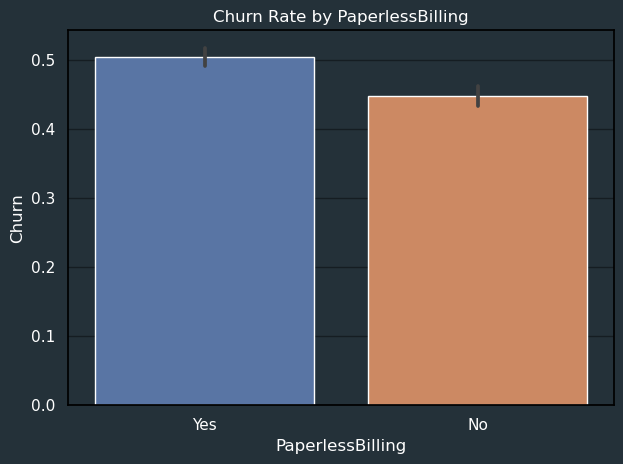

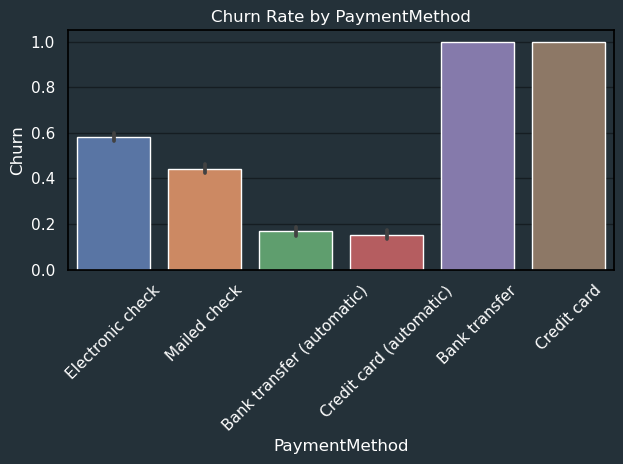

In [134]:
for i in categorical_cols:
    sns.barplot(x=i, y="Churn", data=df)
    plt.title(f'Churn Rate by {i}', color='white')
    if i == 'PaymentMethod':
        plt.xticks(rotation= 45)
    plt.tight_layout()
    plt.show()   

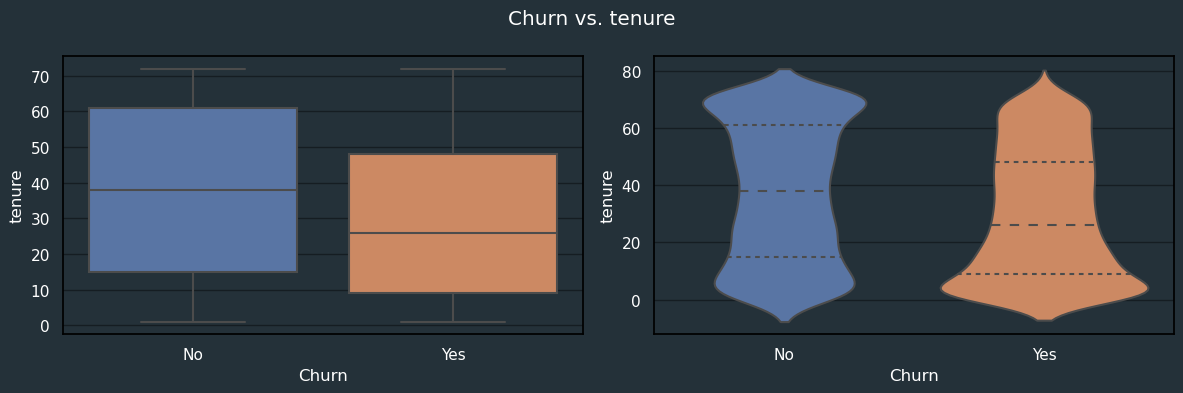

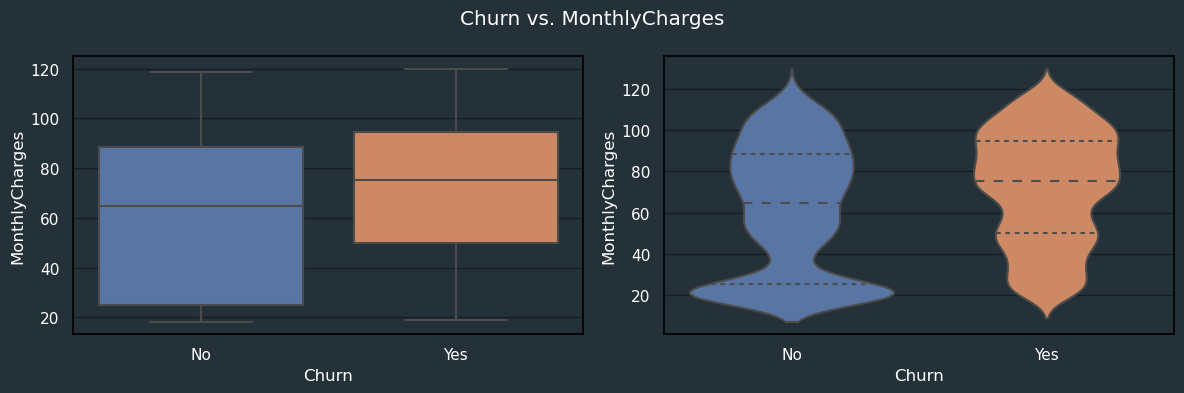

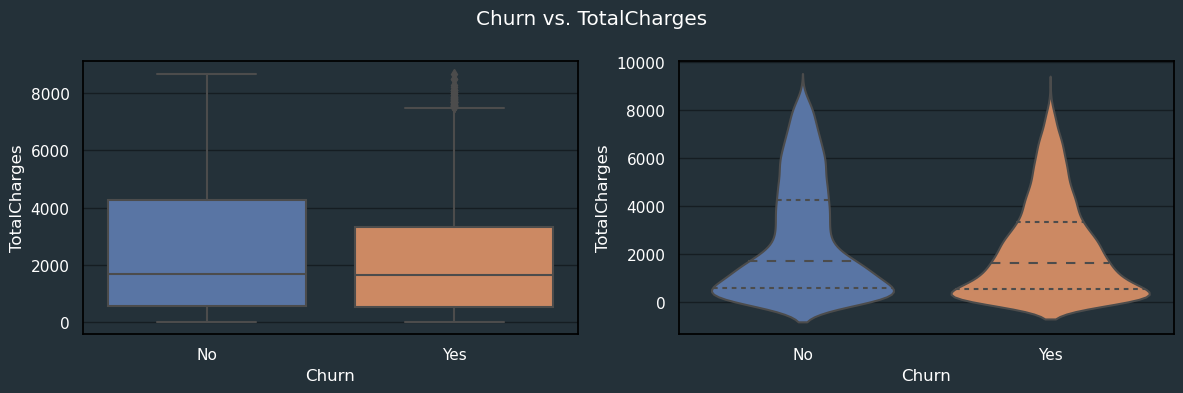

In [135]:
for i in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(x='Churn', y=i, data=df, ax= axes[0])
    axes[0].set_xticks([0,1], ['No','Yes'])
    sns.violinplot(x='Churn', y=i, data=df, inner="quartile", ax = axes[1])
    fig.suptitle(f"Churn vs. {i}", color= 'white')
    axes[1].set_xticks([0,1], ['No','Yes'])
    plt.tight_layout()
    plt.show()
    


In [136]:
df.to_csv("Data/Cleaned Dataset.csv",index= False)